In [1]:
import sys
sys.path.insert(0, '..')
from lib.readers import ExcelReader
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from lib.analyzers import Analysis as analysis
%matplotlib notebook

In [2]:
filename = '/home/enrique/Employee_Dataset.xlsx'
sns.set_palette(palette="muted")
sns.set_style('whitegrid')

In [3]:
reader = ExcelReader(filename)

* Eliminate repeated records (keep last)
* Look for empty values
* Look for null values

In [4]:
reader.get_data('History Data')
data = reader.data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 9 to 49652
Data columns (total 18 columns):
EmployeeID             6284 non-null int64
recorddate_key         6284 non-null datetime64[ns]
birthdate_key          6284 non-null datetime64[ns]
orighiredate_key       6284 non-null datetime64[ns]
terminationdate_key    6284 non-null datetime64[ns]
age                    6284 non-null int64
length_of_service      6284 non-null int64
city_name              6284 non-null object
department_name        6284 non-null object
job_title              6284 non-null object
store_name             6284 non-null int64
gender_short           6284 non-null object
gender_full            6284 non-null object
termreason_desc        6284 non-null object
termtype_desc          6284 non-null object
STATUS_YEAR            6284 non-null int64
STATUS                 6284 non-null object
BUSINESS_UNIT          6284 non-null object
dtypes: datetime64[ns](4), int64(5), object(9)
memory usage: 932.8+ KB


In [6]:
data.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000
mean,5088.843094,44.742998,12.836410,27.098345,2013.979949
std,1956.079548,14.134458,6.747744,13.402742,2.343612
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3482.750000,32.000000,7.000000,16.000000,2015.000000
50%,5180.500000,45.000000,13.000000,28.000000,2015.000000
75%,6765.250000,58.000000,19.000000,41.000000,2015.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [7]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
9,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
19,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
29,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
39,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
49,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [10]:
nonStr = [i for i,value in enumerate(data.termreason_desc) if type(value) != str]
print(nonStr)

[]


In [11]:
print(reader.empty)
print(reader.null)
analyzer = analysis(reader)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


* Plot job condition histogram

<IPython.core.display.Javascript object>


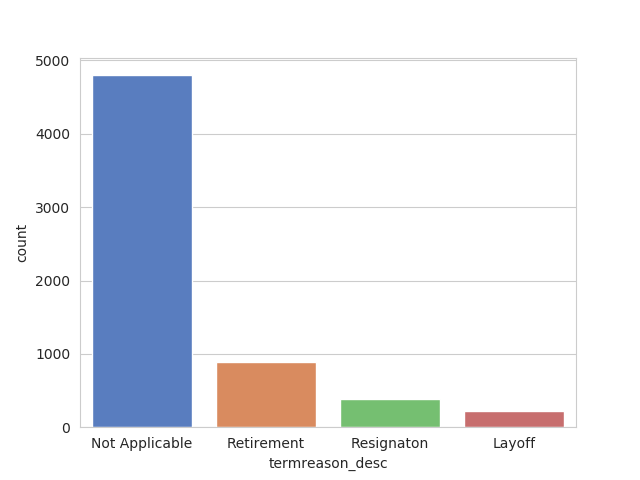

In [12]:
order = ['Not Applicable','Retirement','Resignaton','Layoff']
plt.figure()
ax = sns.countplot(x="termreason_desc",data=data)

* Heavily imbalanced dataset- plot counts of people who quit and people who are fired

<IPython.core.display.Javascript object>


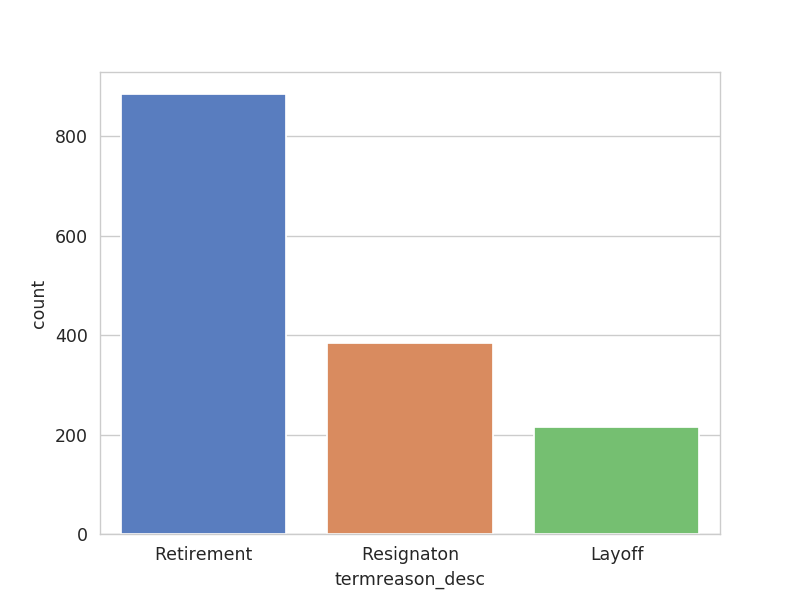

In [26]:
plt.figure()
ax = sns.countplot(x="termreason_desc", data=data, order = ['Retirement','Resignaton','Layoff'])

* Most people retire
* Now let's look how it is affected by age

<IPython.core.display.Javascript object>


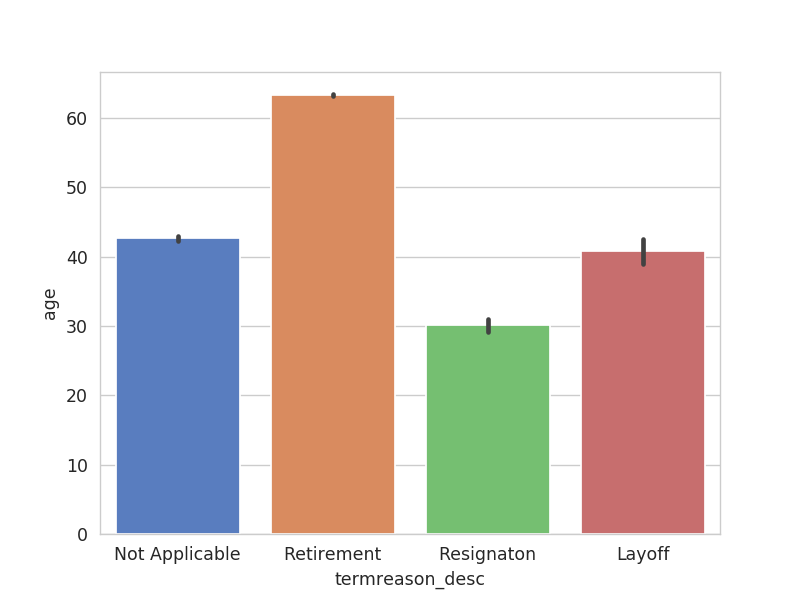

In [35]:
plt.figure()
ax = sns.barplot(x="termreason_desc",y="age", data=data)

<IPython.core.display.Javascript object>


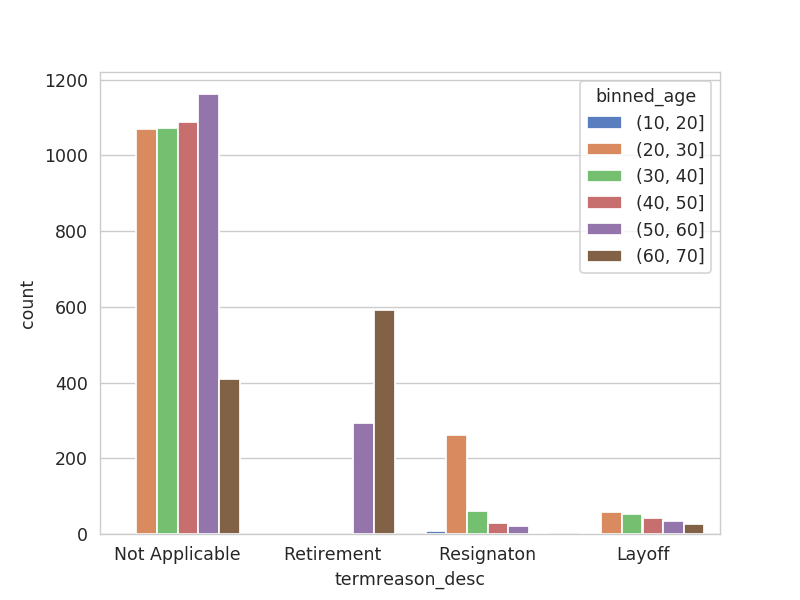

In [21]:
reader.bin_data(binBy='age',groups = range(10,80,10))
plt.figure()
ax = sns.countplot(x="termreason_desc",hue='binned_age' ,data=data)


* The number of workers on the 20-30 age group is surprisingly high, as well as the number of people in that group quitting.

<IPython.core.display.Javascript object>


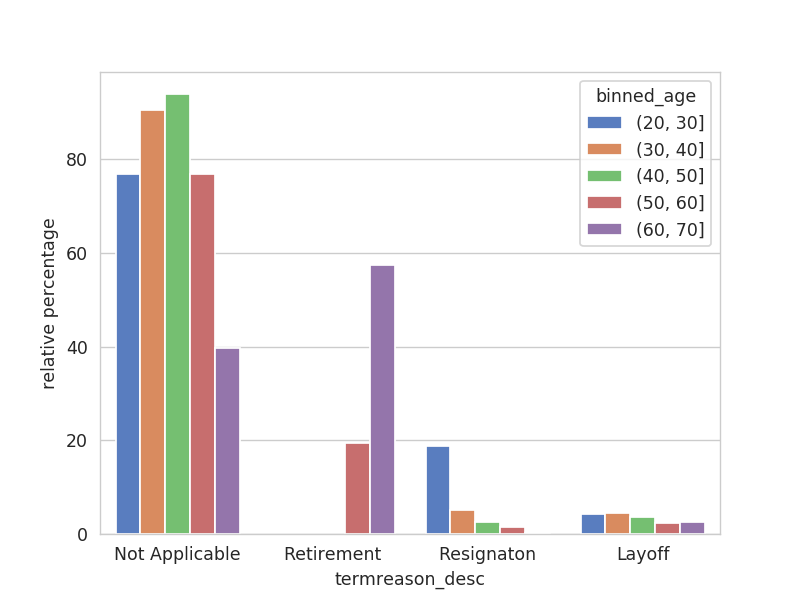

In [57]:
reader.bin_data(binBy='age',groups = range(20,80,10))
relativeDf = analyzer.relativefreq_binned_df(groupby='binned_age',labels='termreason_desc')
plt.figure()
p = sns.barplot(x="termreason_desc", y="relative percentage", hue="binned_age", data=relativeDf,order=order)

* People who are more like to stay are between 40-50, followed by 30-40.
* People from 20 - 30 are more likely to quit.
* Layoffs are sort of equal for 20 - 50.

<IPython.core.display.Javascript object>


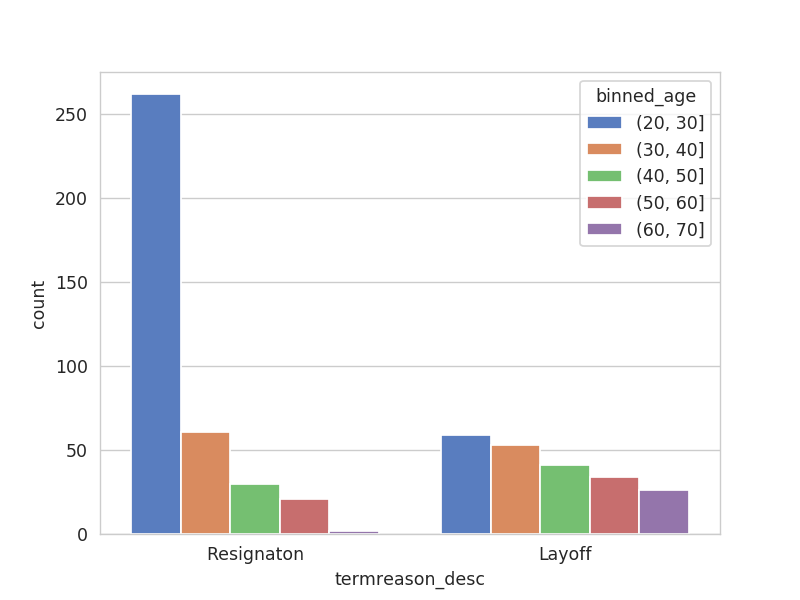

In [32]:
plt.figure()
ax = sns.countplot(x="termreason_desc",hue='binned_age' ,data=data,order = ['Resignaton','Layoff'])

<IPython.core.display.Javascript object>


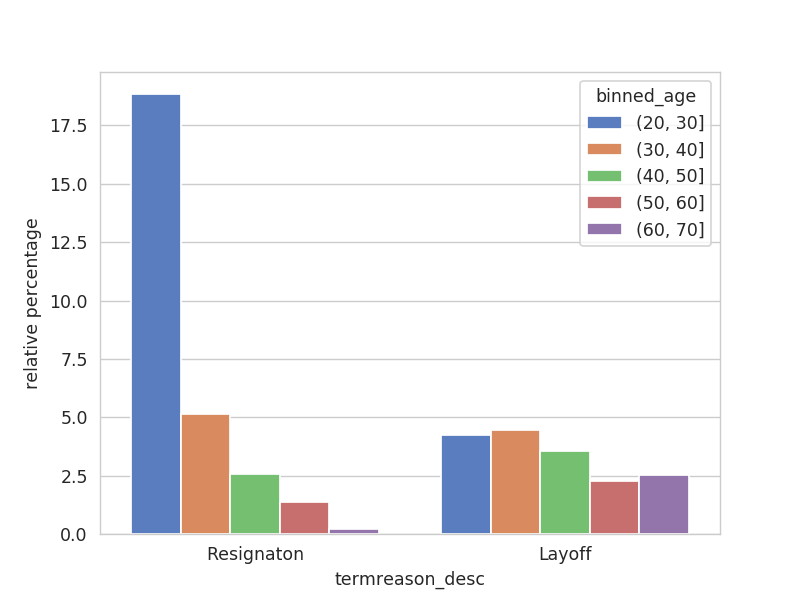

In [33]:
plt.figure()
p = sns.barplot(x="termreason_desc", y="relative percentage", hue="binned_age", data=relativeDf,order=['Resignaton','Layoff'])

# Length of Service Exploratory Analysis

<IPython.core.display.Javascript object>


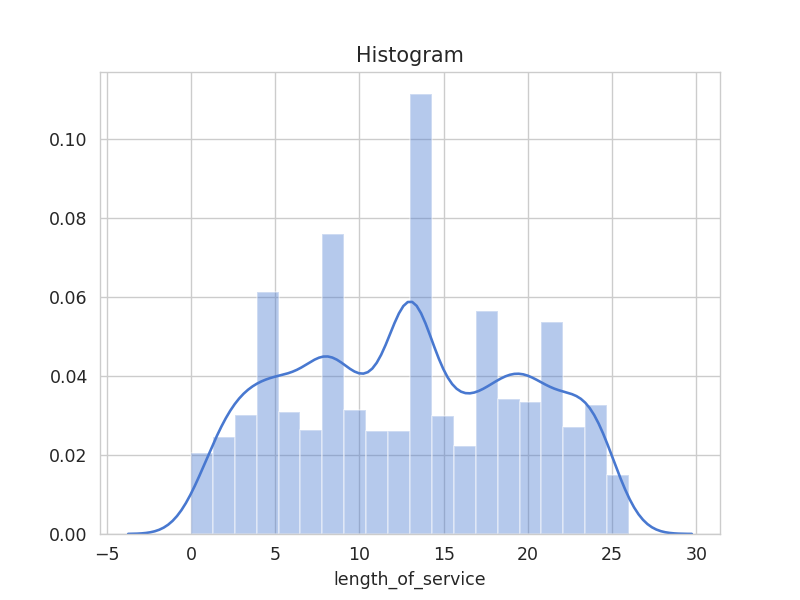

Text(0.5,1,'Histogram')

In [52]:
plt.figure()
sns.distplot(data.length_of_service)
plt.title('Histogram')

<IPython.core.display.Javascript object>


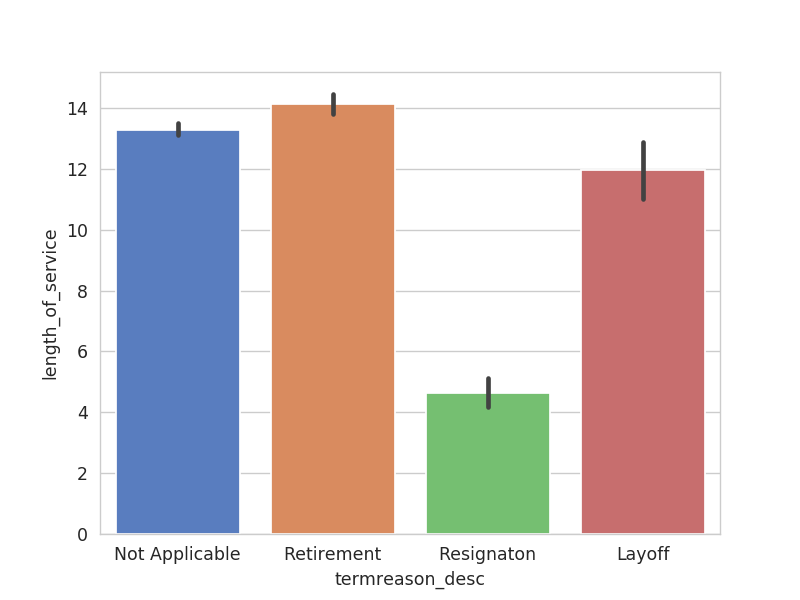

In [41]:
plt.figure()
ax = sns.barplot(x="termreason_desc",y="length_of_service", data=data)

<IPython.core.display.Javascript object>


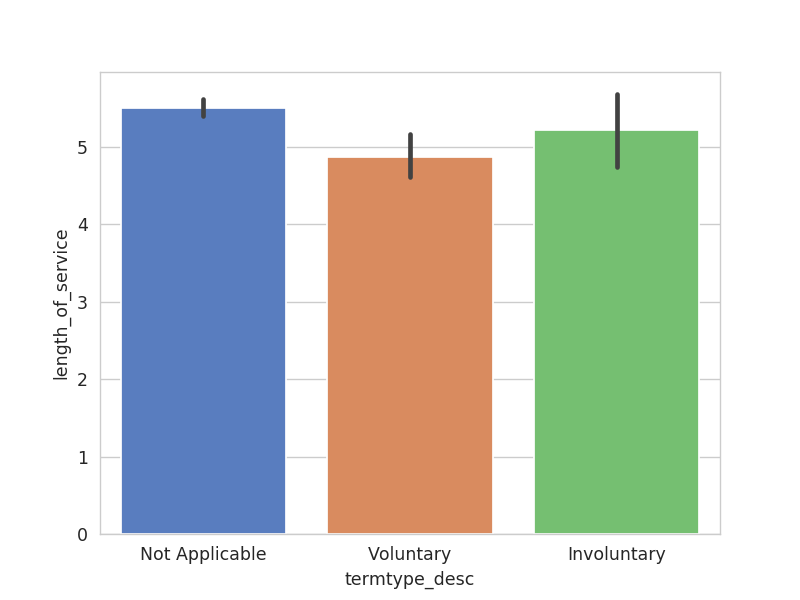

In [39]:
plt.figure()
ax = sns.barplot(x="termtype_desc",y="length_of_service", data=data.where(data.length_of_service< 10))

<IPython.core.display.Javascript object>


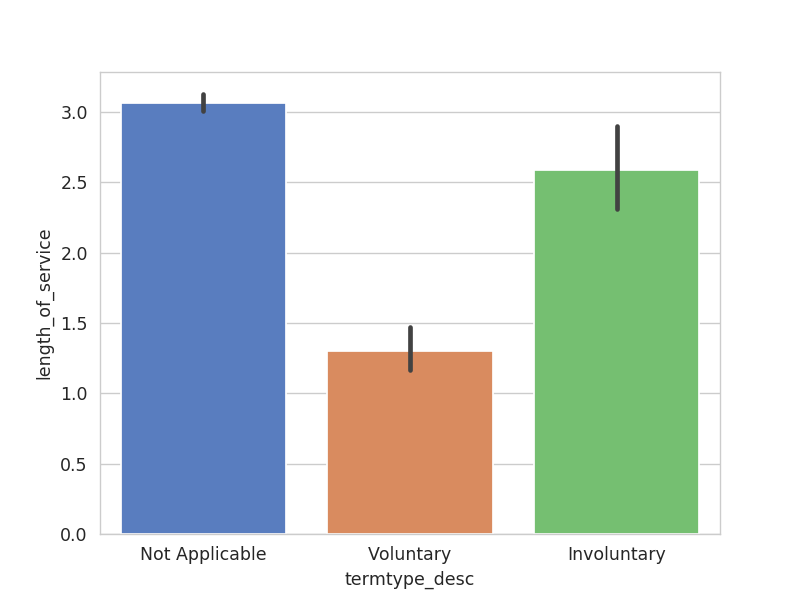

In [40]:
plt.figure()
ax = sns.barplot(x="termtype_desc",y="length_of_service", data=data.where(data.length_of_service< 5))

<IPython.core.display.Javascript object>


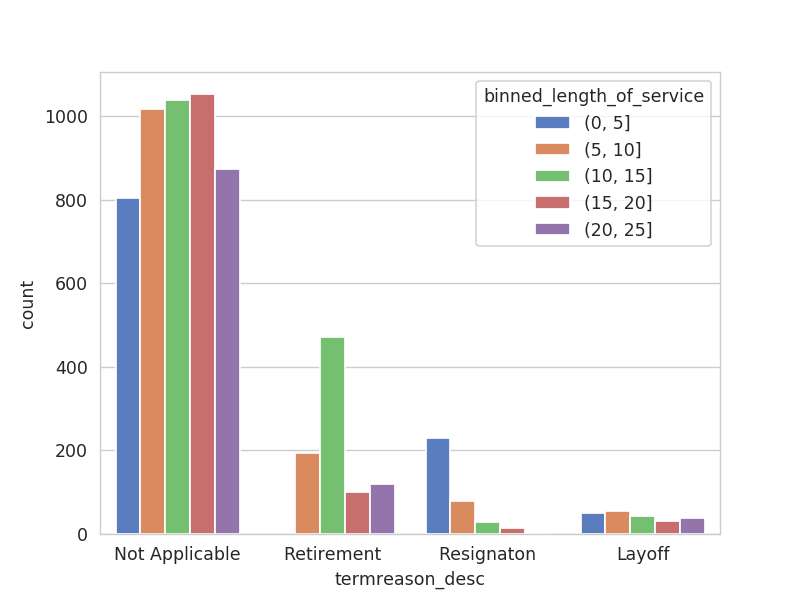

In [60]:
groups = range(0,30,5)
reader.bin_data(binBy='length_of_service',groups = groups)
plt.figure()
ax = sns.countplot(x="termreason_desc",hue='binned_length_of_service' ,data=data)


* People with 0-5 years of service tend to be more likely to resign
* The trend goes down pretty quickly as people spend longer in the organization.
* A large number of the population of people working have been in the organization for 10~20 years.
* Of course this is not relative, so let's look at the next plot.

<IPython.core.display.Javascript object>


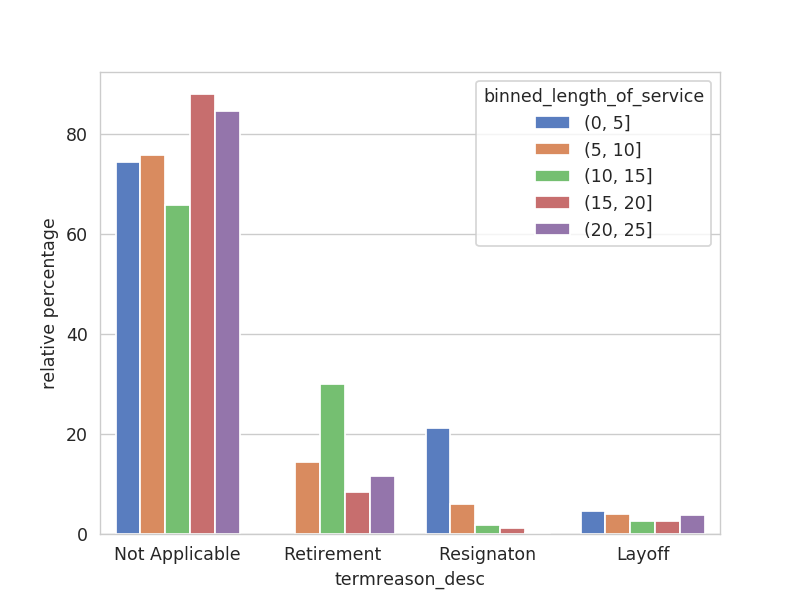

In [62]:
reader.bin_data(binBy='length_of_service',groups = range(0,30,5))
relativeDf = analyzer.relativefreq_binned_df(groupby='binned_length_of_service',labels='termreason_desc')
plt.figure()
p = sns.barplot(x="termreason_desc", y="relative percentage", hue="binned_length_of_service", data=relativeDf,order=order)

* People are more likely to stay if they've been working in the organization for 15 ~ 25 years
* People are more likely to leave (retire) if they've been working for 10 ~ 15 tears in the organization.
* Age and length of service are probably related, we would look at this on a following scatter plot, and this would potentially affect predictive models as we would want to capture the relationship between these predictors.
* People are more likely to resign if they've been working for 0 ~ 5 years.

<IPython.core.display.Javascript object>


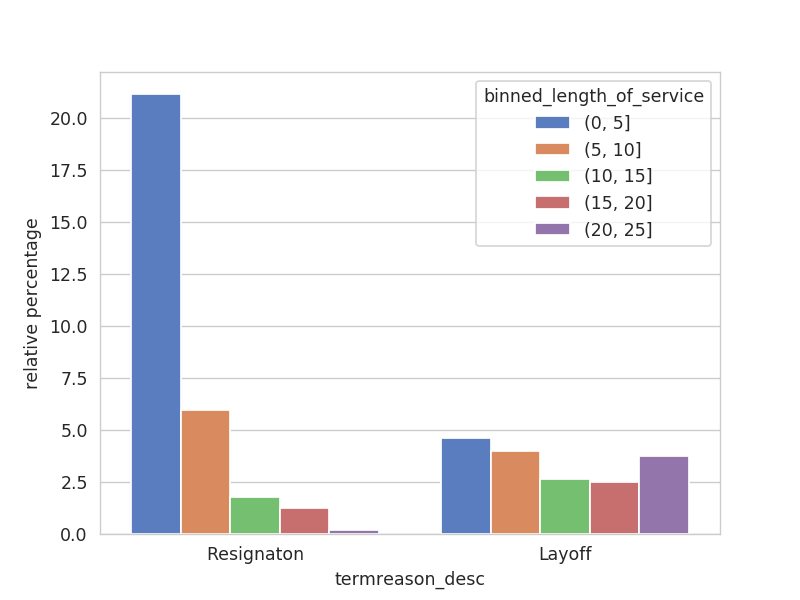

In [63]:
plt.figure()
p = sns.barplot(x="termreason_desc", y="relative percentage", hue="binned_length_of_service", data=relativeDf,order=['Resignaton','Layoff'])

# Gender exploratory analysis

<IPython.core.display.Javascript object>


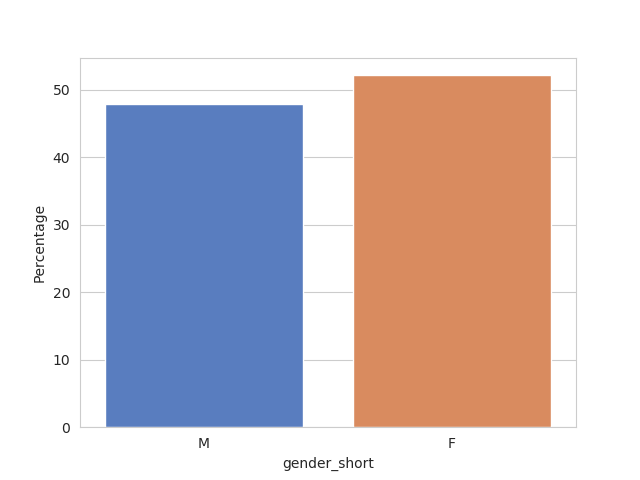

Text(0,0.5,'Percentage')

In [74]:
plt.figure()
ax = sns.barplot(x="gender_short",y="age", data=data,estimator = lambda x: len(x) / len(data) * 100)
plt.ylabel('Percentage')

* There are slightly more females in the organization, but not critical.

<IPython.core.display.Javascript object>


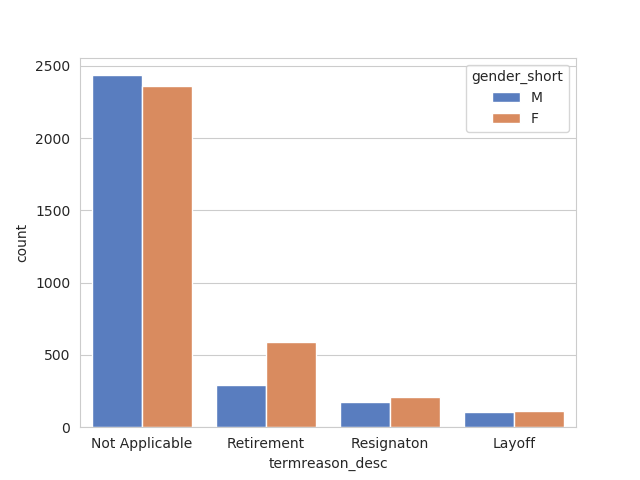

In [77]:
plt.figure()
ax = sns.countplot(x="termreason_desc",hue="gender_short", data=data,palette=["C0", "C1"])

<IPython.core.display.Javascript object>


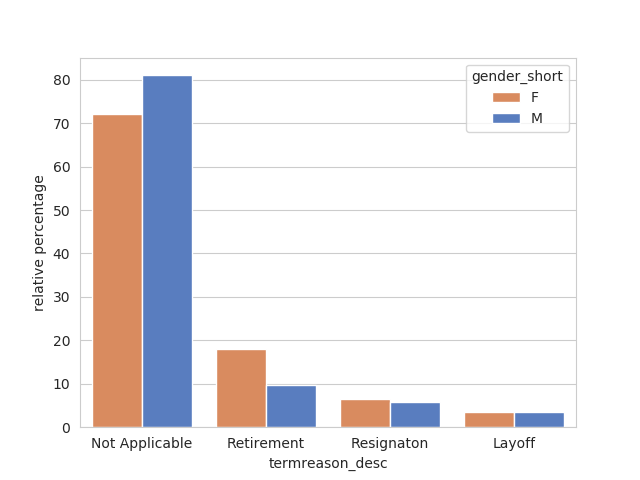

In [79]:
relativeDf = analyzer.relativefreq_binned_df(groupby='gender_short',labels='termreason_desc')
plt.figure()
p = sns.barplot(x="termreason_desc", y="relative percentage", hue="gender_short", data=relativeDf,order=order,palette=["C1", "C0"])

* Females are seem more likely to retire than men, and slightly more likely to resign. But in in general terms, layoffs and resignations are pretty equal.

<IPython.core.display.Javascript object>


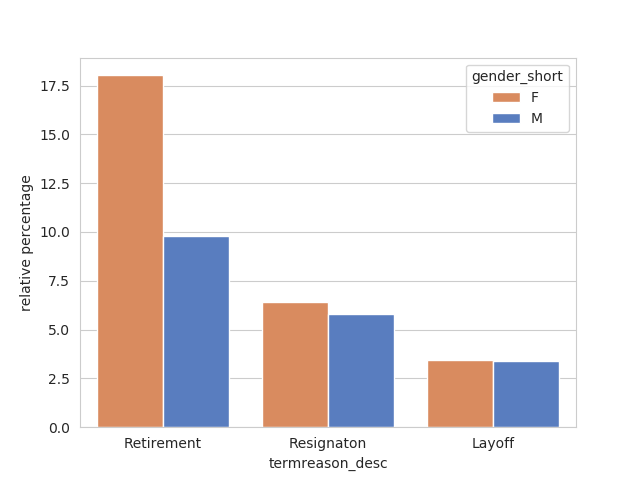

In [80]:
plt.figure()
p = sns.barplot(x="termreason_desc", y="relative percentage", hue="gender_short", data=relativeDf,order=["Retirement",'Resignaton','Layoff'],palette=["C1", "C0"])

* 

<IPython.core.display.Javascript object>


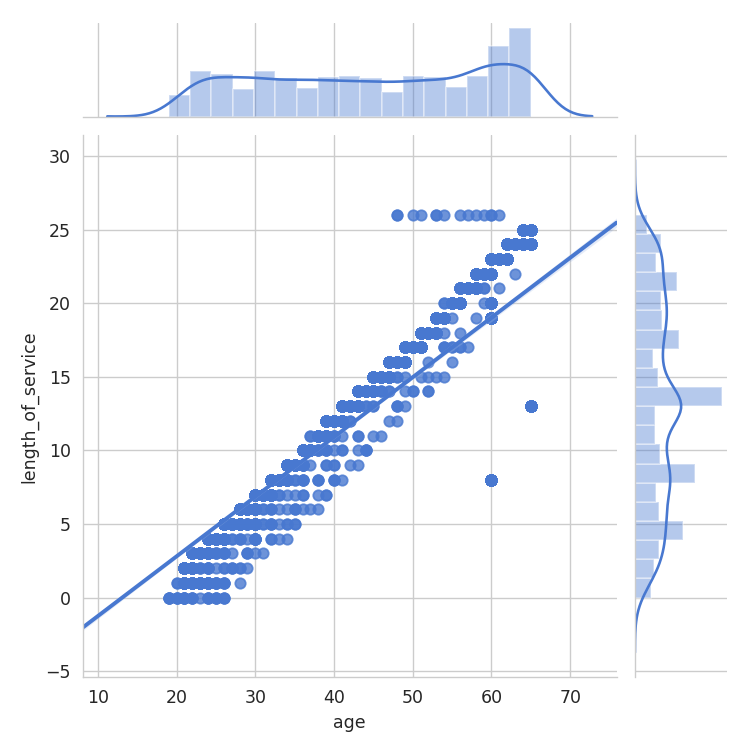

In [66]:
sns.jointplot(x = 'age', y = 'length_of_service', data= data, kind = "reg")

* There is a clear correlation between age and length of service.
* There's a few outliers pushing the linear fit, but that's alright.

In [13]:
reader.get_data('Additional Employee Attribute','EMPLOYEE ID')

In [14]:
addData = reader.data

In [15]:
addData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 0 to 6283
Data columns (total 10 columns):
EMPLOYEE ID                   6284 non-null int64
Ethnicity                     6284 non-null int64
Marital Status                6284 non-null int64
Manager's Gender              6284 non-null int64
Manager's Age                 6284 non-null int64
Number of Promotions          6284 non-null int64
Is Top Talent                 6284 non-null int64
Distance from Work (miles)    6284 non-null int64
Compa-Ratio                   6284 non-null float64
Is Manager                    6284 non-null int64
dtypes: float64(1), int64(9)
memory usage: 540.0 KB


In [16]:
addData.describe()

,EMPLOYEE ID,Ethnicity,Marital Status,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager
count,6284.000000,6284.000000,6284.000000,6284.000000,6284.00000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000
mean,5088.843094,1.795831,1.621579,1.512253,45.02578,1.996181,0.172661,17.448122,1.004723,0.349300
std,1956.079548,1.209349,0.713673,0.499890,6.06464,0.817202,0.377984,7.519004,0.085426,0.476787
min,1318.000000,1.000000,1.000000,1.000000,35.00000,1.000000,0.000000,5.000000,0.501076,0.000000
25%,3482.750000,1.000000,1.000000,1.000000,40.00000,1.000000,0.000000,11.000000,1.000000,0.000000
50%,5180.500000,1.000000,1.000000,2.000000,45.00000,2.000000,0.000000,18.000000,1.000000,0.000000
75%,6765.250000,2.000000,2.000000,2.000000,50.00000,3.000000,0.000000,24.000000,1.000000,1.000000
max,8336.000000,5.000000,3.000000,2.000000,55.00000,3.000000,1.000000,30.000000,1.204923,1.000000


In [17]:
print(reader.empty)
print(reader.null)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [19]:
historicalData = data[['EmployeeID','age','gender_short','termreason_desc']]

In [21]:
reader.merge_data(historicalData,on='EmployeeID',originalkey='EMPLOYEE ID')

In [22]:
data = reader.data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 0 to 6283
Data columns (total 13 columns):
EmployeeID                    6284 non-null int64
Ethnicity                     6284 non-null int64
Marital Status                6284 non-null int64
Manager's Gender              6284 non-null int64
Manager's Age                 6284 non-null int64
Number of Promotions          6284 non-null int64
Is Top Talent                 6284 non-null int64
Distance from Work (miles)    6284 non-null int64
Compa-Ratio                   6284 non-null float64
Is Manager                    6284 non-null int64
age                           6284 non-null int64
gender_short                  6284 non-null object
termreason_desc               6284 non-null object
dtypes: float64(1), int64(10), object(2)
memory usage: 687.3+ KB


In [24]:
data.head()

,EmployeeID,Ethnicity,Marital Status,Manager's Gender,Manager's Age,Number of Promotions,Is Top Talent,Distance from Work (miles),Compa-Ratio,Is Manager,age,gender_short,termreason_desc
0,1318,1,2,1,53,3,1,19,1.0,0,61,M,Not Applicable
1,1319,1,1,1,39,2,0,17,1.0,0,58,F,Not Applicable
2,1320,1,3,1,47,1,0,7,1.0,1,60,F,Not Applicable
3,1321,1,2,2,49,2,0,9,1.0,0,56,M,Not Applicable
4,1322,1,1,1,54,2,0,30,1.0,0,57,M,Not Applicable


* After the merge occurs the reader checks for empty or null values, lets check those results

In [25]:
print(reader.empty)
print(reader.null)

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
